### I. Setup and Load Data
1.1 Install Dependencies and Setup

In [162]:
import tensorflow as tf
import os
from keras.metrics import Accuracy

In [163]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [164]:
import cv2
import imghdr

In [165]:
data_dir = 'data'

In [166]:
img_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [167]:
for img_class in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir, img_class)):
        img_path = os.path.join(data_dir, img_class, img)
        print(img_path)

data\happy\05-12-21-happy-people.jpg
data\happy\07-120104-happy_people_are_not_nice_people.jpg
data\happy\1-2.jpg
data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
data\happy\11-Habits-of-Truly-Happy-People.jpg
data\happy\154006829.jpg
data\happy\170404-happy-workers-feature.jpg
data\happy\1902539.jpg
data\happy\1902540.jpg
data\happy\1902587.jpg
data\happy\1920px-face-smile.svg_.png.jpg
data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
data\happy\227-2271622_happy-people-business-team-celebrating-png.png
data\happy\60632274._UY200_.jpg
data\happy\7-Habits-of-Happy-People-image.jpeg
data\happy\7-principles-of-successful-and-happy-people.png
data\happy\7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
data\happy\8cxKy5g9i.jpg
data\happy\960x0.jpg
data\happy\ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg
data\happy\A_Sep20_14_1189155141.jpg
data\happy\bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
data\happy\blog_image_20180219221810890.jpg
data\happy\brady-

In [168]:
tip = imghdr.what(os.path.join('data', 'happy', '_happy_jumping_on_beach-40815.jpg'))
print(tip)


jpeg


2. Remove dodgy images

In [169]:
for img_class in os.listdir(data_dir):  # img_class = [happy, sad]
    for img in os.listdir(os.path.join(data_dir, img_class)):  #img = all img
        img_path = os.path.join(data_dir, img_class, img)   # Tạo đường dẫn cho bức ảnh.
        try:
            img = cv2.imread(img_path) # Đọc img đưa về dưới dạng tensor
            tip = imghdr.what(img_path) # Lấy ra định dạng của file ảnh.
            if tip not in img_exts: 
                print("Img not in ext list {}".format(img_path))
                os.remove(img_path)

        except Exception as e:
            print("Issue with img {}".format(img_path))

3. Load Data

In [170]:
import numpy as np
import matplotlib.pyplot as plt

In [171]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [172]:
data_iterator = data.as_numpy_iterator()

In [173]:
batch = data_iterator.next()    

In [174]:
batch[0].shape #(32, 256, 256, 3) batch_size = 32, img_size = (256,256,3)

(32, 256, 256, 3)

In [175]:
batch[1] # Nhãn của 32 bức ảnh

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [176]:
batch[1].shape

(32,)

In [177]:
batch[0].shape

(32, 256, 256, 3)

In [178]:
batch[0][:4].shape

(4, 256, 256, 3)

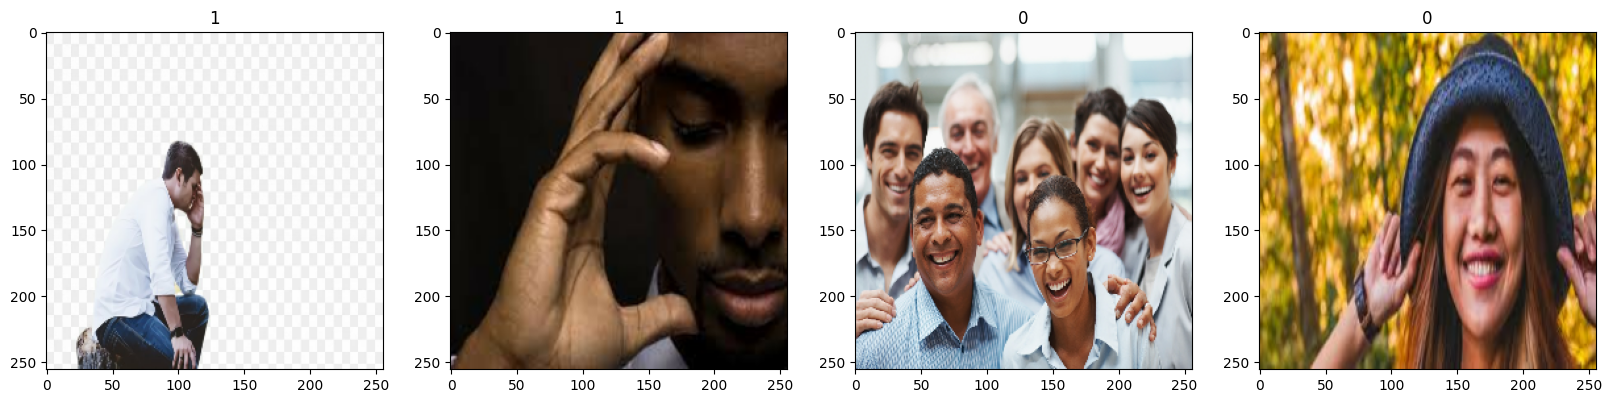

In [179]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20)) # Vẽ ra 4 ảnh với size = 20, 20
for idx, img in enumerate(batch[0][:4]): # Vòng lặp lấy ra 4 bức ảnh và nhãn
    ax[idx].imshow(img.astype(int)) 
    ax[idx].title.set_text(batch[1][idx])


### II. Preprocess Data
2.1 Scale Data

In [180]:
batch[0].min()

0.0

In [181]:
batch[0].max()

255.0

In [182]:
data = data.map(lambda x,y:(x/255, y))

In [183]:
scaled_iterator=data.as_numpy_iterator()

In [184]:
batch = scaled_iterator.next()

In [185]:
batch[0].max()

1.0

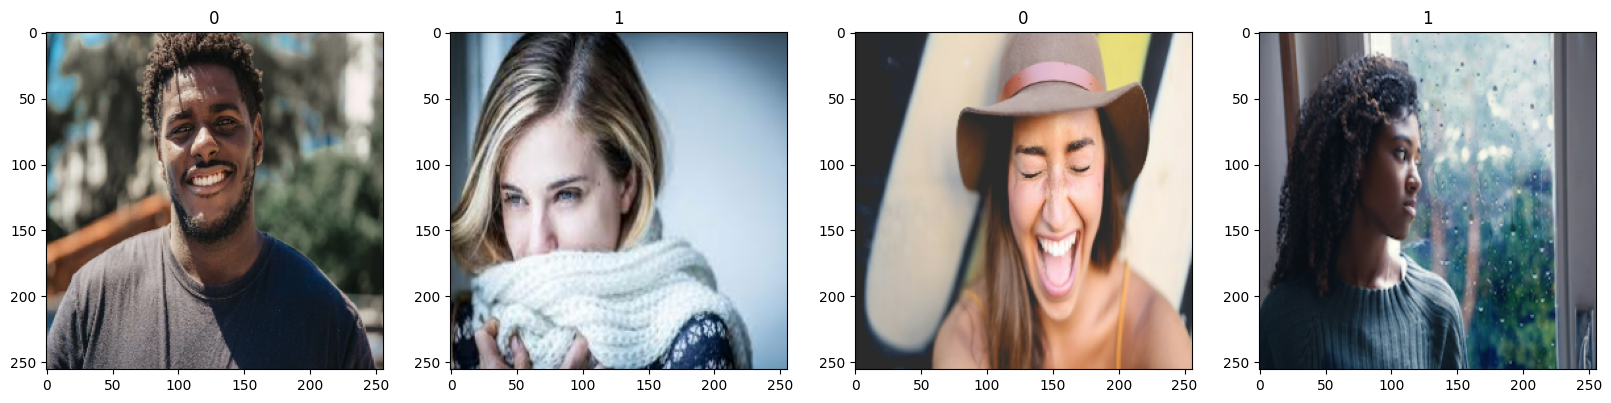

In [186]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20)) # Vẽ ra 4 ảnh với size = 20, 20
for idx, img in enumerate(batch[0][:4]): # Vòng lặp lấy ra 4 bức ảnh và nhãn
    ax[idx].imshow(img) 
    ax[idx].title.set_text(batch[1][idx])

2.2 Split Data

In [187]:
len(data)

10

In [188]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [189]:
train_size

7

In [190]:
test_size

1

In [191]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

### III. Deep Model

3.1 Building Deep Learning Model

In [192]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [193]:
model = Sequential()


In [194]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
#
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
#
model.add(Dense(256, activation='relu'))
#
model.add(Dense(1, activation='sigmoid'))
#

c:\Users\286ng\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [195]:
import keras

In [196]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[Accuracy])

In [197]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

3.2 Train

In [198]:
logdir = 'logs'

In [199]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [200]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20


c:\Users\286ng\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\tensorboard.py:668: UserWarning: Model failed to serialize as JSON. Ignoring... Accuracy.get_config() missing 1 required positional argument: 'self'
  warnings.warn(f"Model failed to serialize as JSON. Ignoring... {exc}")
c:\Users\286ng\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.0515 - loss: 0.0000e+00 - val_accuracy: 0.4531 - val_loss: 0.0000e+00
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 792ms/step - accuracy: 0.5383 - loss: 0.0000e+00 - val_accuracy: 0.5625 - val_loss: 0.0000e+00
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 700ms/step - accuracy: 0.5059 - loss: 0.0000e+00 - val_accuracy: 0.4062 - val_loss: 0.0000e+00
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 689ms/step - accuracy: 0.4931 - loss: 0.0000e+00 - val_accuracy: 0.4688 - val_loss: 0.0000e+00
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 667ms/step - accuracy: 0.4877 - loss: 0.0000e+00 - val_accuracy: 0.5469 - val_loss: 0.0000e+00
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 709ms/step - accuracy: 0.5146 - loss: 0.0000e+00 - val_accuracy: 0.4531 - val_loss: 0.0000e+00
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 620ms/step - accuracy: 0.4708 - loss: 0.0000e+00 - val_accuracy: 0.4844 - val_loss: 0.0000e+00
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 629ms/step - accuracy: 0.5497 - loss

In [201]:
hist.history

{'accuracy': [0.1517857164144516,
  0.5,
  0.5178571343421936,
  0.5089285969734192,
  0.4910714328289032,
  0.5,
  0.4910714328289032,
  0.5267857313156128,
  0.5267857313156128,
  0.5,
  0.5044642686843872,
  0.4821428656578064,
  0.5,
  0.4955357015132904,
  0.4821428656578064,
  0.5089285969734192,
  0.4955357015132904,
  0.4955357015132904,
  0.5,
  0.5],
 'loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'val_accuracy': [0.453125,
  0.5625,
  0.40625,
  0.46875,
  0.546875,
  0.453125,
  0.484375,
  0.515625,
  0.578125,
  0.578125,
  0.484375,
  0.46875,
  0.546875,
  0.4375,
  0.609375,
  0.515625,
  0.484375,
  0.5,
  0.59375,
  0.484375],
 'val_loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]}

3.3 Plot Performance

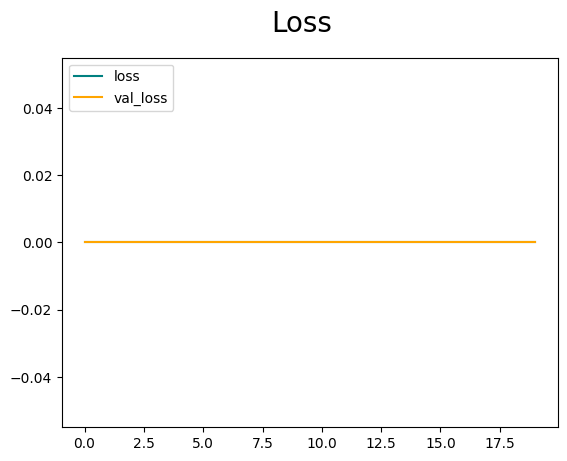

In [202]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color= 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper left")
plt.show()

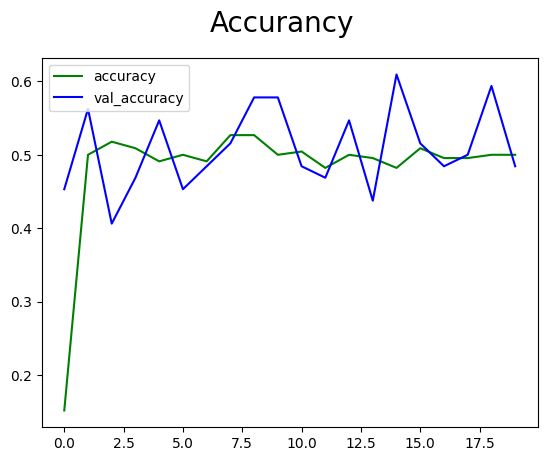

In [203]:
fig_binary_accuracy = plt.figure()
plt.plot(hist.history["accuracy"], color = "green", label = "accuracy")
plt.plot(hist.history["val_accuracy"], color = "blue", label = "val_accuracy")
fig_binary_accuracy.suptitle("Accurancy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

### IV. Evaluate Performance

4.1 Evaluate

In [204]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [205]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [206]:
for batch in test.as_numpy_iterator():
    X, y = batch
    y_hat = model.predict(X)
    pre.update_state(y, y_hat)
    rec.update_state(y, y_hat)
    acc.update_state(y, y_hat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [207]:
print(f'Precision: {pre.result().numpy()}, Recall:{rec.result().numpy()}, Accurancy:{acc.result().numpy()}')

Precision: 0.0, Recall:0.0, Accurancy:0.47058823704719543


4.2 Test

In [208]:
import cv2

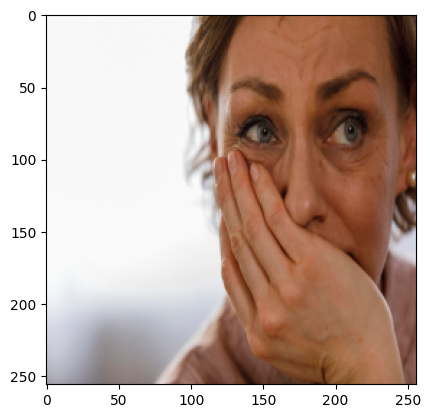

In [226]:
img = cv2.imread('img_test/0x0.jpg')
width = 256
height = 256
dim = (width, height)
img_resize = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB))
plt.show()

In [227]:
img_resize.shape

(256, 256, 3)

In [228]:
np.expand_dims(img_resize, 0).shape

(1, 256, 256, 3)

In [229]:
y_hat = model.predict(np.expand_dims(img_resize/255, 0))
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.]], dtype=float32)

In [225]:
if y_hat > 0.5:
    print(f'Precision class is Sad')
else:
    print(f'Precision class is Happy')

Precision class is Happy


### V. Save The Model

5.1 Save the model

In [214]:
from tensorflow.keras.models import load_model

In [215]:
model.save(os.path.join('models', 'happyandsadmodel.h5'))

TypeError: Accuracy.get_config() missing 1 required positional argument: 'self'

In [ ]:
new_model = load_model(os.path.join('models', 'happyandsadmodel.h5'))

In [ ]:
y_hat_new = new_model.predict(np.expand_dims(img_resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


In [ ]:
if y_hat_new > 0.5:
    print(f'Precision class is Sad')
else:
    print(f'Precision class is Happy')

Precision class is Sad
